In [1]:
import pandas as pd
import numpy as np

# Visual checks
import matplotlib.pyplot as plt
import seaborn as sns

**Import** **Dataset**

In [3]:
raw_df = pd.read_csv("/content/indian_food.csv")

In [3]:
raw_df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [5]:
raw_df.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


In [7]:
raw_df.tail()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central
254,Pinaca,"Brown rice, fennel seeds, grated coconut, blac...",vegetarian,-1,-1,sweet,dessert,Goa,West


In [6]:
raw_df.isnull().sum()

,0
name,0
ingredients,0
diet,0
prep_time,0
cook_time,0
flavor_profile,0
course,0
state,0
region,1


In [8]:
raw_df['region'].isnull().sum()


np.int64(1)

In [9]:
raw_df['region'] = raw_df['region'].fillna("Unknown")

Standardizing Data

In [10]:
raw_df["diet"] = raw_df["diet"].str.strip().str.lower()
raw_df["diet"] = raw_df["diet"].replace({"vegetarian": "veg", "non vegetarian": "non-veg"})


In [11]:
raw_df = raw_df.drop_duplicates()

In [12]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          255 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [13]:
raw_df["total_time"] = raw_df["prep_time"] + raw_df["cook_time"]

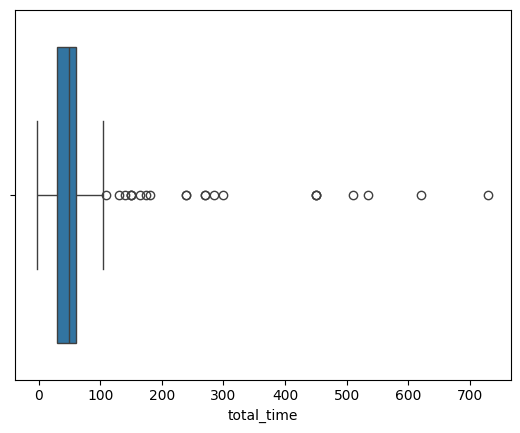

In [14]:
sns.boxplot(x=raw_df["total_time"])
plt.show()

In [15]:
df = pd.get_dummies(
    raw_df,
    columns=["diet","course","state","region","flavor_profile"],
    drop_first=True
)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   name                   255 non-null    object
 1   ingredients            255 non-null    object
 2   prep_time              255 non-null    int64 
 3   cook_time              255 non-null    int64 
 4   total_time             255 non-null    int64 
 5   diet_veg               255 non-null    bool  
 6   course_main course     255 non-null    bool  
 7   course_snack           255 non-null    bool  
 8   course_starter         255 non-null    bool  
 9   state_Andhra Pradesh   255 non-null    bool  
 10  state_Assam            255 non-null    bool  
 11  state_Bihar            255 non-null    bool  
 12  state_Chhattisgarh     255 non-null    bool  
 13  state_Goa              255 non-null    bool  
 14  state_Gujarat          255 non-null    bool  
 15  state_Haryana          

In [18]:
df.to_csv("indian_food_cleaned.csv", index=False)


In [19]:
from google.colab import files

files.download("indian_food_cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>